# K-means

Resources:

* [ML Handbook](https://education.yandex.ru/handbook/ml/article/beta-klasterizaciya#metod-k-srednih)

* {cite}`pml1Book`, section 21.3

* Skoltech [lecture](https://github.com/adasegroup/ML2023_lectures/tree/main/lecture16) on clusterizaion

## K-means on MNIST

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

%config InlineBackend.figure_format = 'svg'

X, y = fetch_openml('mnist_784', return_X_y=True, parser='auto')
X = X.astype(float).values / 255
y = y.astype(int).values

Apply mini-batch K-means:

In [22]:
from sklearn.cluster import MiniBatchKMeans
kmeans_mini = MiniBatchKMeans(n_clusters=10, n_init='auto')
%time kmeans_mini.fit(X)
print("Intertia:", kmeans_mini.inertia_)
print("Class labels:", kmeans_mini.labels_)

CPU times: user 1.55 s, sys: 322 ms, total: 1.87 s
Wall time: 1.61 s
Intertia: 2790795.572726004
Class labels: [0 4 6 ... 5 8 1]


Now plot the cluster centers:

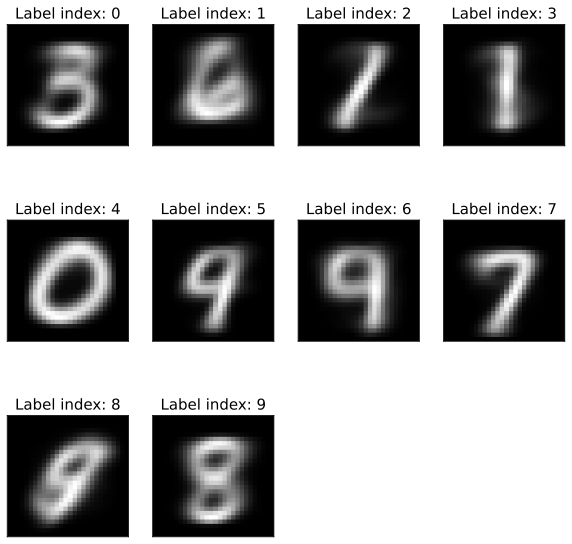

In [23]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(3, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(kmeans_mini.cluster_centers_[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label index: {i}", size=15)

Can you guess who is who here?

Now take the true K-means.

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, n_init='auto')
%time kmeans.fit(X)
print("Intertia:", kmeans.inertia_)
print("Class labels:", kmeans.labels_)

CPU times: user 19.9 s, sys: 1.14 s, total: 21 s
Wall time: 20.2 s
Intertia: 2762817.9021432903
Class labels: [9 8 7 ... 2 4 6]


Once again plot the centers of clusters:

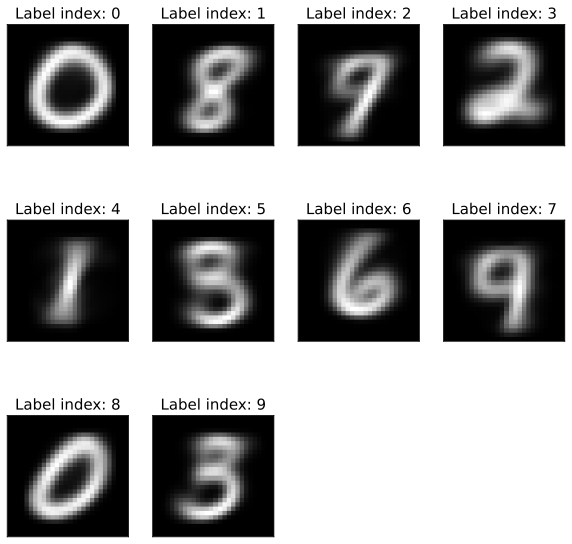

In [24]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(3, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(kmeans.cluster_centers_[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label index: {i}", size=15)